<div style='text-align: center;'>
    <h2><strong>LIFE EXPECTANCY & GDP</strong></h2>
    <h4 style='text-align: center;'>To explore and investigate whether a <i>strong correlation</i> exists between a nation's economic productivity and the life expectancy of its inhabitants</h4>
</div>
<p style= 'text-align: right'><i>A case study by waqas</i></p>

### Overview
We explore if a link exists between a nation's GDP and the life expectancy of its citizens. Understanding this connection can guide policymakers in improving public health and societal well-being.

### Objective
The objective is to prepare data, followed by analysis with plots, and seek to explain the findings from the study to answer following questions.

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**
- Data set comprises of six nations
- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


<h2 id ="stages"><strong>Stages</strong></h2>

* <a href ="#inspect">Stage 1: Importing Modules & Loading Data</a>
* <a href ="#eda">Stage 2: Exploratory Data Analysis - EDA</a>
* <a href ="#concl">Stage 3: Conclusions & Findings</a>

<h2 id ="inspect"><strong>Stage 1: Import Python Modules & Data</strong></h2>

First import the preliminary modules that will be used in this project:

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Loading the Data

To analyze the relationship between GDP and life expectancy,
- load the **'all_data.csv'** dataset into a DataFrame named 'df.' 
- Use the '.head()' method to inspect the DataFrame and examine its contents

In [3]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


An additional examination of the `df` shape reveals 96 rows and 4 columns in the dataset.

In [4]:
df.shape

(96, 4)

=> <a href ="#stages">Return to Top </a>

<h2 id ="eda"><strong>Stage 2: Explore the Data</strong></h2>

Let's delve deeper into the countries represented in the DataFrame. It appears that there are six countries in the dataset: Chile, China, Germany, Mexico, the US, and Zimbabwe.

In [5]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


- The next step is to find out which years are represented in the data, and they are 2000-2015.

In [6]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


### **Cleaning Column Names**

Inconsistencies in column names were identified in the dataset. For example:
- The first two column names consist of one word each.
- The third column name is "Life expectancy at birth (years)," which is lengthy and less code-friendly.

**Column Name Transformation**
We used the `rename` function to change the third column's name to 'LEABY' (Life Expectancy At Birth, Years). This ensures consistency and simplifies the dataset for analysis and visualization.

In [7]:
df = df.rename({"Life expectancy at birth (years)":"LEABY"}, axis = "columns")
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Exploratory Plots

### GDP Distribution

Examine the distribution of GDP within the dataset.

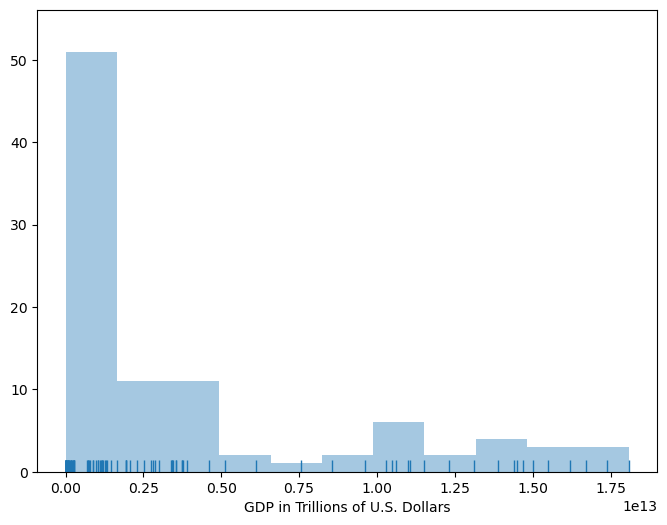

In [16]:
plt.figure(figsize=(8,6))
sns.distplot(df.GDP, rug = True, kde=False)
plt.xlabel("GDP in Trillions of U.S. Dollars");

- **The GDP data** within this dataset displays a _notable right-skew_, indicating that the majority of values cluster on the left side of the distribution curve.

- The observed GDP distribution can be characterized as a _power law distribution_, a well-defined distribution type with its own distinct name and characteristic properties.


### LEABY Distribution

Lets examine the distribution of `LEABY`.

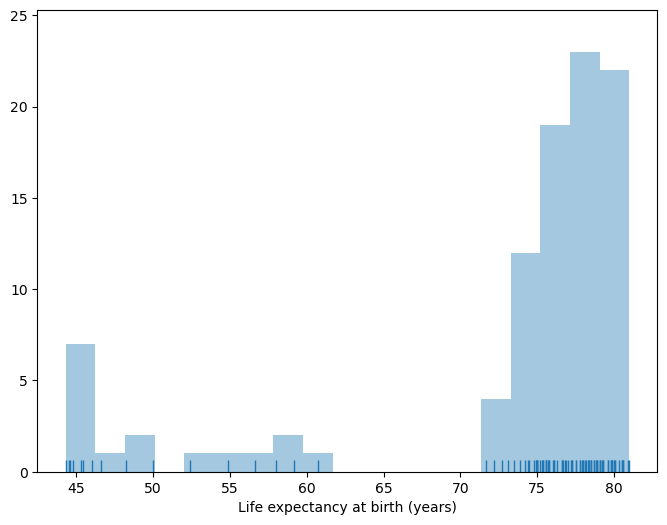

In [15]:
plt.figure(figsize=(8,6))
sns.distplot(df.LEABY, rug = True, kde=False)
plt.xlabel("Life expectancy at birth (years)");


- **Insight:** The **`LEABY`** distribution in the dataset exhibits a _pronounced left skew_, with the majority of values concentrated towards the right side.
- This contrasts with the findings in the GDP column, and a closer examination may reveal _distinct patterns or subgroups_ within the dataset.

**Data breaking by Country**

The previous plots did not break up the data by countries, so the next task will be to find the average `LEABY` and `GDP` by country.

In [17]:
dfMeans = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()

In [18]:
dfMeans

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


- Now that they are broken down by Country, and the average values for **LEEABY** and **GDP** are created, bar plots showing the mean values for each variable are created below.

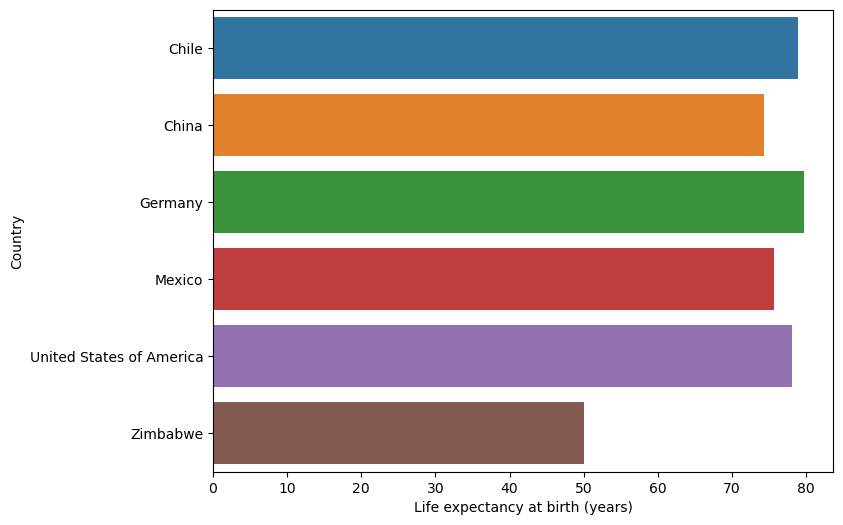

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(x="LEABY", y="Country", data=dfMeans)
plt.xlabel("Life expectancy at birth (years)");

- **Insight:**
The first plot is **Life Expectancy**, and all of the countries except for Zimbabwe have values in the mid-to-high 70s. This probably explains the skew in the distribution from before!


**Average GDP by Country**

Lets examine average `GDP` by `Country`

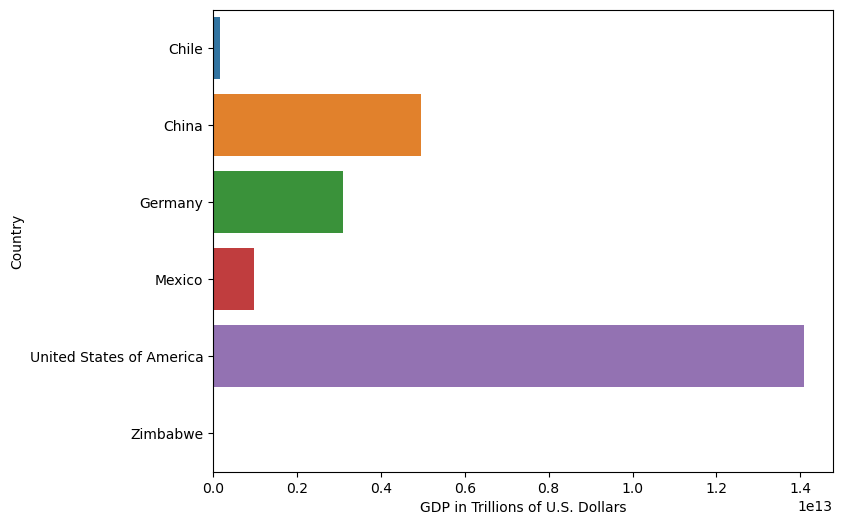

In [20]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=dfMeans)
plt.xlabel("GDP in Trillions of U.S. Dollars");

- **Insight:** For the average `GDP` by `Country`:
  - The **US** stands out with a significantly higher value compared to other countries.
  - **Zimbabwe** is barely visible on the bar plot.
  - **Chile** is also hardly noticeable.
  - In stark contrast, the **USA** exhibits an enormous GDP compared to the rest.
  - **China**, **Germany**, and **Mexico** appear relatively close in figures.

#### Violin Plots

Lets compare data by visualizing the distributions of each and to look for patterns in the shapes

Lets use violin plot as to visualize shape of the distribution compared to the box plot. 
- Below, country is on the x-axis
- Distribution of numeric columns : `GDP` and `LEABY` are on the y axis

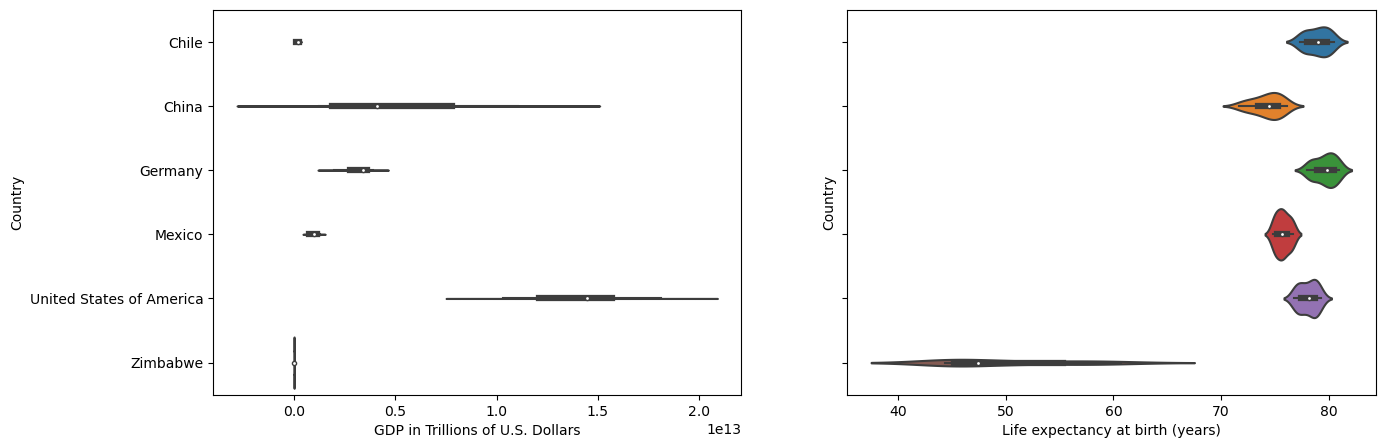

In [13]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

**Insights:** 
- In the GDP plot on the left:
  - **China** and the **US** have relatively wide ranges.
  - **Zimbabwe**, **Chile**, and **Mexico** have shorter ranges.

- In the LEABY plot:
  - Many countries have shorter ranges.
  - **Zimbabwe** stands out with a range spanning from the high **30s** to the high **60s**
  .


#### Swarm Plots

Swarm Plots are used to complement the box and violin plots 
- First the stand alone swarm plot is shown 
- Second then overlayed on top of a violin plot

Swarm plots are useful because they show dot density around the values as well as distribution through area/shape. 

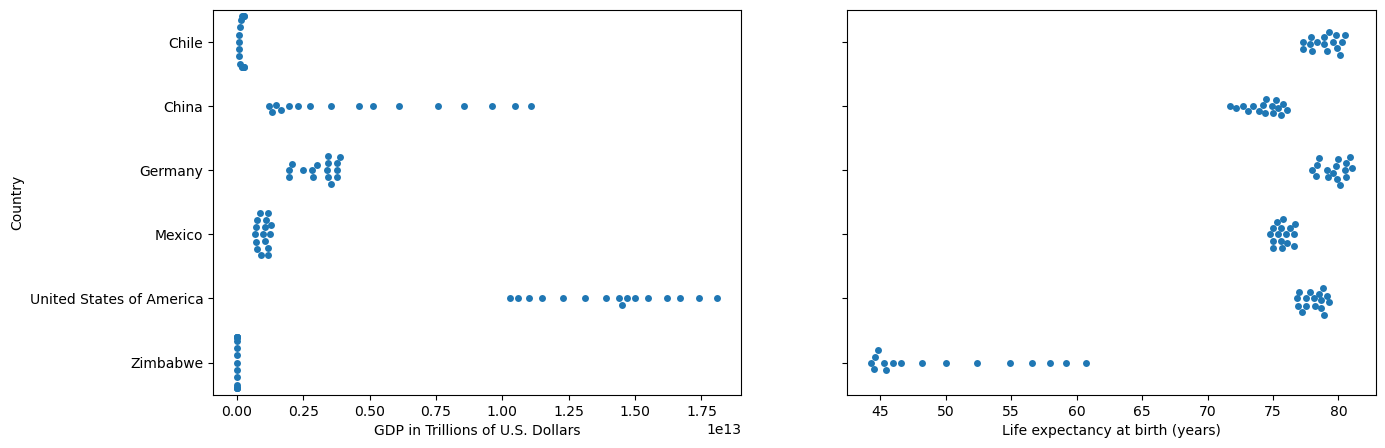

In [28]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.swarmplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

import warnings
warnings.filterwarnings("ignore", message="56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.", category=UserWarning)

**Insights:** 
In the case of the **GDP** plot on the left:
  - **Chile** and **Zimbabwe** have a vertical line of dots that illustrate the number of data points that fall around their values
  - This detail would have been lost in the box plot, unless the reader is very adept at data visualizations


**Overlayed Swarm Plot** 

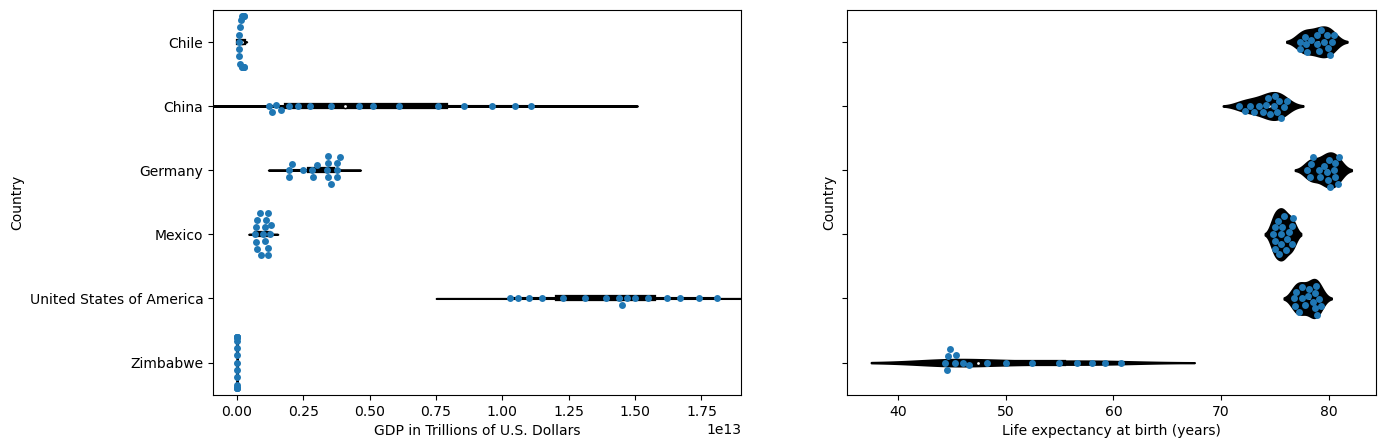

In [30]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country,color = "black")
axes[0] = sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country, color = "black")
axes[1] = sns.swarmplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

**Insight**
Overlayed Swarm plot on top of violin provides a balance between showing the overall distribution (violin plot) and the granularity of individual data points (swarm plot).

#### Line Charts

- Next, the data will explore **GDP** and **LEABY** over the years through line charts.
- Below, the countries are separated by colors, and one can see that the **US** and **China** have seen substantial gains between 2000-2015.

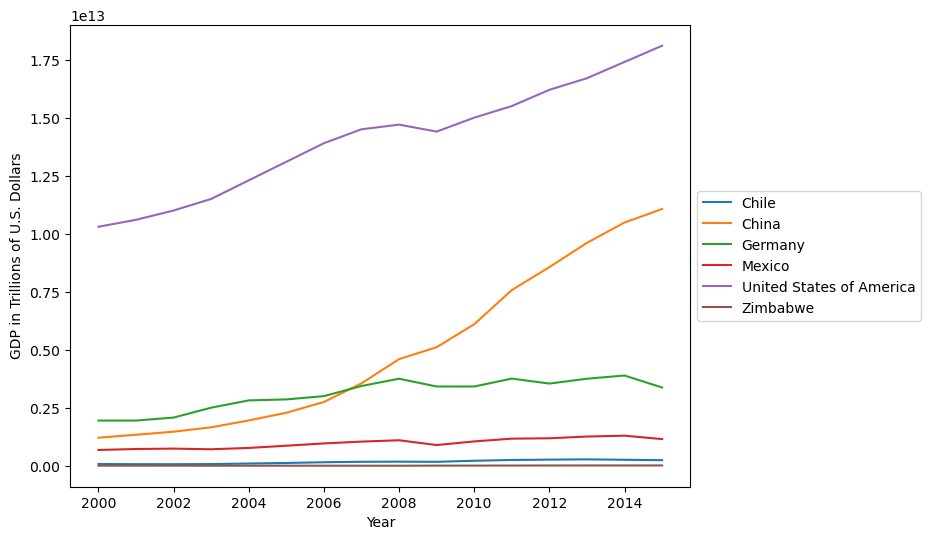

In [16]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars");


**Insight:** China went from less than a quarter trillion dollars to one trillion dollars in the time span. The rest of the countries did not see increases in this magnitude.

#### Faceted Line Chart - GDP vs Years
Lets visualize individual country GDP performance over the years without the same scale via faceted charts

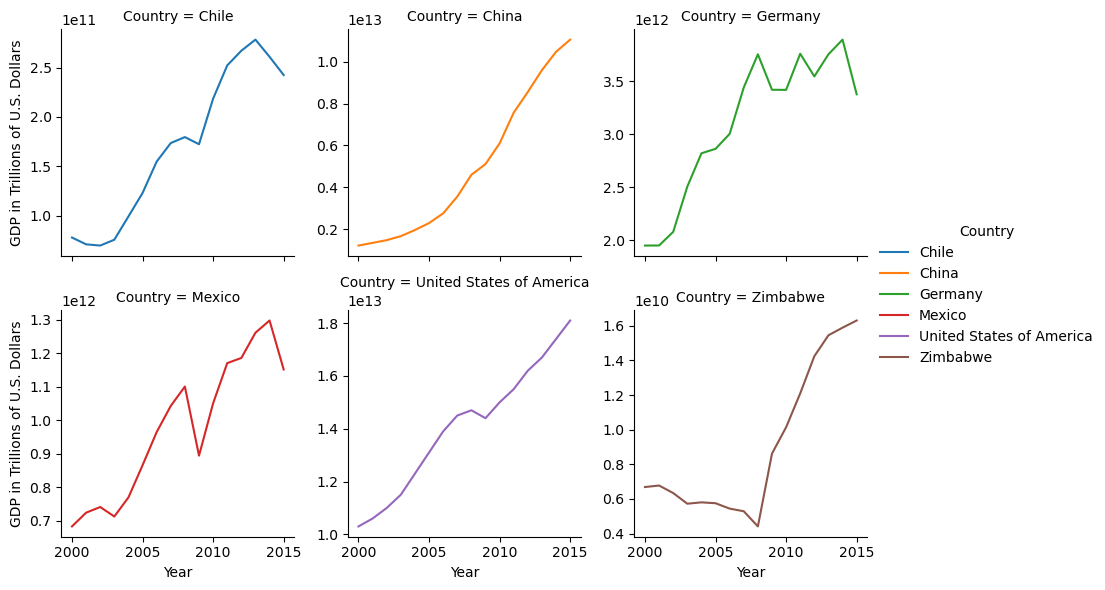

In [17]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphGDP;

**Insight** 
- This method makes it easier to see that all of the countries have seen increases.
- In the chart above, the other countries' **GDP** growth looked modest compared to **China** and the **US**, but all of the countries did experience growth from the year 2000.


#### Line Plot - Life Expectancy Vs Years

The chart below shows now looks at life expectancy over the years. The chart shows that every country has been increasing their life expectancy, but Zimbabwe has seen the greatest increase after a bit of a dip around 2004.

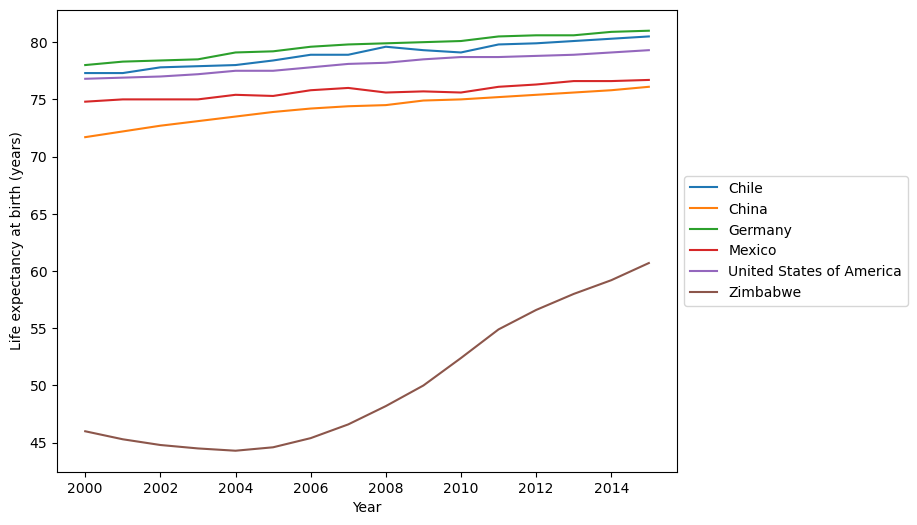

In [18]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)");


**Insights** 
- The chart below now looks at **life expectancy** over the years.
- It demonstrates that every country has been **increasing** their life expectancy, with *Zimbabwe experiencing the greatest increase after a slight dip around 2004.*

### Facet Grid - Life Expectancy by Country

Much like the break down of GDP by country before, the plot below breaks out life expectancy by country. 

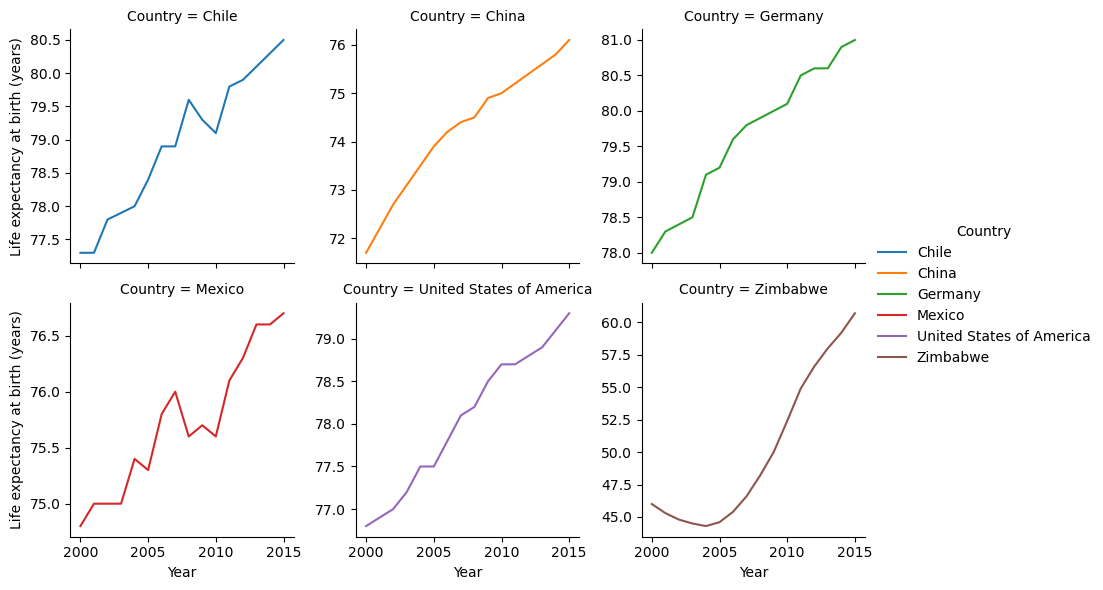

In [19]:
graphLEABY = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLEABY = (graphLEABY.map(sns.lineplot,"Year","LEABY")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

graphLEABY;

**Insights**
- It is apparent that **Chile** and **Mexico** seemed to have **dips in their life expectancy** around the same time, which could be looked into further.
- Many of these nuances were lost when the y-axis was shared among the countries
- Also, the seemingly linear changes were, in reality, not as smooth for some of the countries

#### Scatter Plot - LEABY vs GDP

The next two charts will explore the relationship between `GDP` and `LEABY`

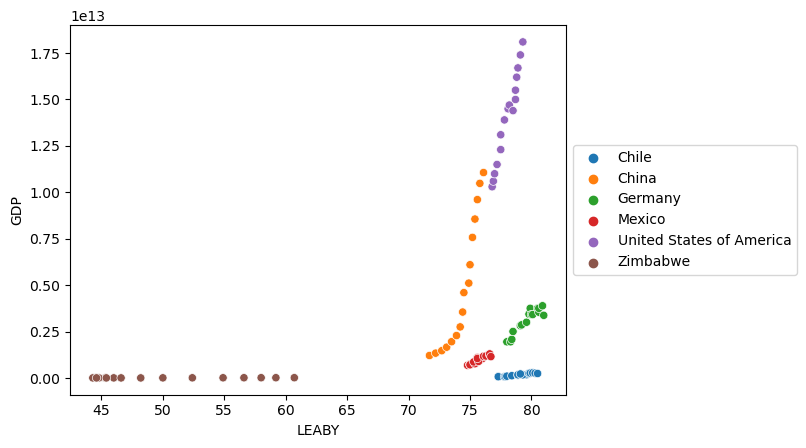

In [20]:
sns.scatterplot(x=df.LEABY, y=df.GDP, hue=df.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

**Insights** In the chart above:
  - **GDP** for **Zimbabwe** appears to stay flat while their **life expectancy** is going up.
  - Other countries show a rise in life expectancy as GDP increases.
  - The **US** and **China** exhibit very similar slopes in their relationship between GDP and life expectancy.


### Scatter Plot Facet - GDP vs LEABY

Like the previous plots, countries are broken out into each scatter plot by facets

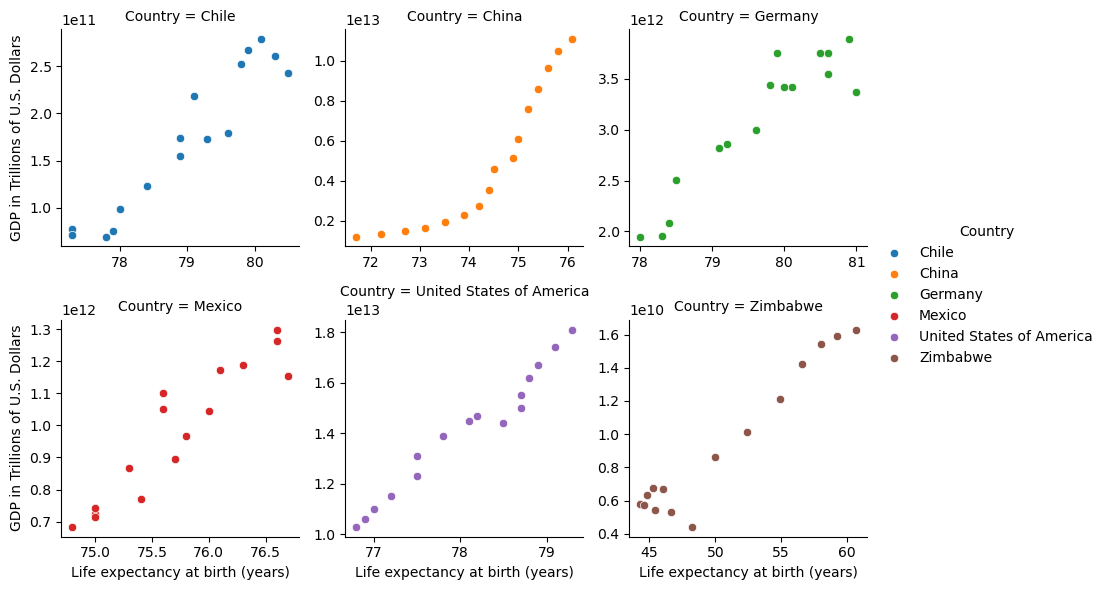

In [21]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));


**Insights:** In the graph above, Looking at the individual countries:
  - Most countries like the **US**, **Mexico**, and **Zimbabwe** have linear relationships between GDP and life expectancy.
  - **China** has a slightly exponential curve, and **Chile's** looks a bit logarithmic.
  - In general, one can observe an increase in GDP and life expectancy, exhibiting a positive correlation.

=> <a href ="#stages">Return to Top </a>

<h2 id ="concl"><strong>Stage 3: Conclusion & Insights <strong></h2>

This project was able to create numerous data visualizations with the data, despite having only 96 rows and 4 columns.

The project successfully addressed some of the initial questions:

  - **Has life expectancy increased over time in the six nations?**
    - *Yes*, with ***Zimbabwe*** experiencing the greatest increase. 
    
    </br>
  - **Has GDP increased over time in the six nations?**
    - *GDP has been increased* for all countries in our list, especially for ***China***.
    
    </br>
  - **Is there a correlation between GDP and life expectancy of a country?**
    - *Yes*, there is a *positive correlation* between GDP and life expectancy for countries in our list.
    
    </br>
  - **What is the average life expectancy in these nations?**
    - Average life expectancy was between *mid to high 70s* for most countries, except for ***Zimbabwe***, which was *50*.

    </br>
  - **What is the distribution of that life expectancy?**
    - The life expectancy had a *left skew*, with most of the observations on the right side.
    
    </br>


## Further Research 

- The study aimed to explore the factors contributing to the **drastic increase in GDP** in China over the past 10 years.

- According to a [Forbes article](https://www.forbes.com/sites/peterpham/2018/03/06/is-there-a-secret-growth-hormone-added-to-chinas-economy/#40869ba53f13), China's unmatched **GDP growth** in the past decades was attributed to its *large population*, newly available *capital*, and *manufacturing efficiency*. 

- The study can confirm that the findings in the data align with the real-world findings for GDP growth in China.

*Thank you for sticking around*

=> <a href ="#stages">Return to Top </a>